/home/ubuntu/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
RandomForest:   0%|          | 0/5 [00:00<?, ?it/s]

[*] load dataset : ./dataset_test_case_01.csv
[*] train set split
[*] train RandomForest
[*] train result : 
	Accuracy 	: 0.9264498937093925
	Percision 	:  0.9174009177669739
	Recall 		:  0.927598255111142
	F1-Score 	:  0.9218962410481611
[*] Confusion matrix : 


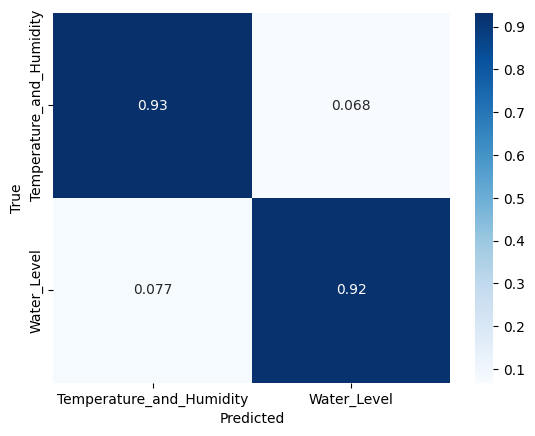

[*] Feature Importances: 
[0.342 0.055 0.37  0.156 0.076]

flow_duration: 0.342
mqtt_duration: 0.055
mqtt_connection_duration: 0.370
mqtt_connection_ack_duration: 0.156
mqtt_disconnection_duration: 0.076


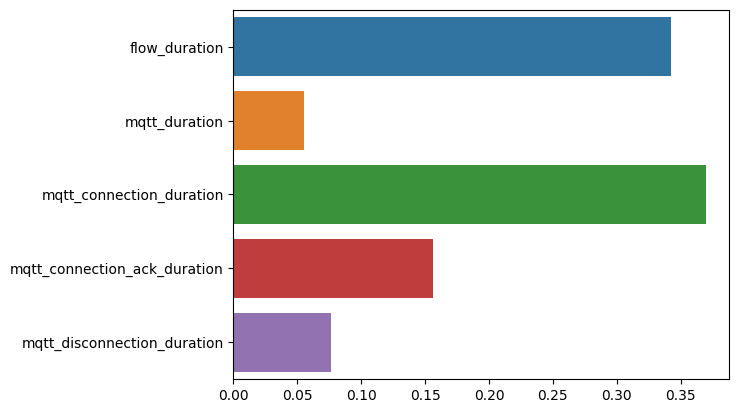

RandomForest:  20%|██        | 1/5 [00:34<02:18, 34.66s/it]

[*] load dataset : ./dataset_test_case_02.csv
[*] train set split
[*] train RandomForest
[*] train result : 
	Accuracy 	: 0.9323621069314173
	Percision 	:  0.8834443100243498
	Recall 		:  0.8969760055499412
	F1-Score 	:  0.8899860898230096
[*] Confusion matrix : 


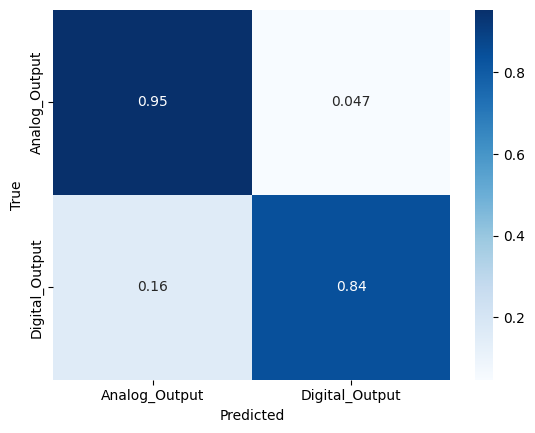

[*] Feature Importances: 
[0.287 0.069 0.399 0.17  0.075]

flow_duration: 0.287
mqtt_duration: 0.069
mqtt_connection_duration: 0.399
mqtt_connection_ack_duration: 0.170
mqtt_disconnection_duration: 0.075


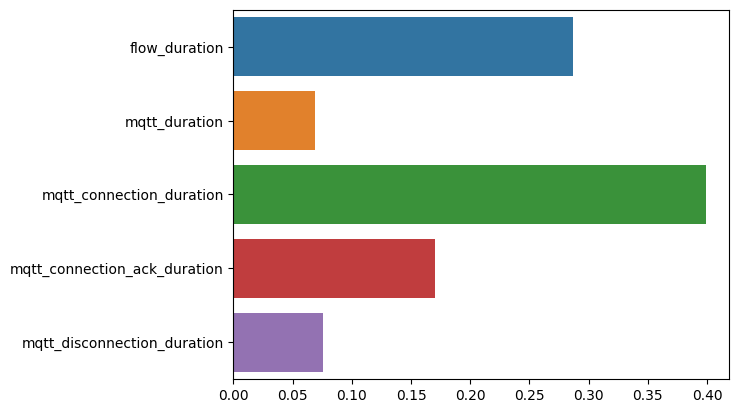

RandomForest:  40%|████      | 2/5 [01:46<02:49, 56.36s/it]

[*] load dataset : dataset_test_case_03_Digital.csv
[*] train set split
[*] train RandomForest
[*] train result : 
	Accuracy 	: 0.9435345217627364
	Percision 	:  0.9461903424358198
	Recall 		:  0.9402928939643895
	F1-Score 	:  0.9425953708532231
[*] Confusion matrix : 


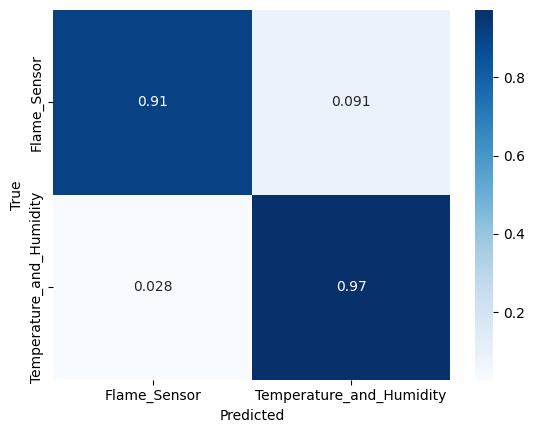

[*] Feature Importances: 
[0.246 0.045 0.45  0.2   0.059]

flow_duration: 0.246
mqtt_duration: 0.045
mqtt_connection_duration: 0.450
mqtt_connection_ack_duration: 0.200
mqtt_disconnection_duration: 0.059


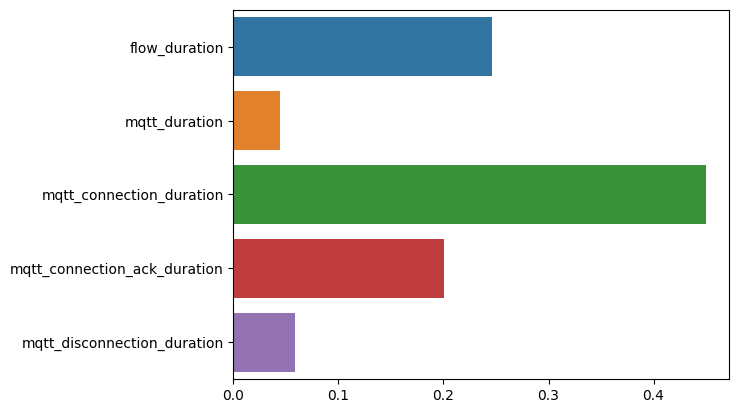

RandomForest:  60%|██████    | 3/5 [02:09<01:22, 41.14s/it]

[*] load dataset : dataset_test_case_03_Analog.csv
[*] train set split
[*] train RandomForest
[*] train result : 
	Accuracy 	: 0.4368862903830298
	Percision 	:  0.3498718505957164
	Recall 		:  0.3222972905648861
	F1-Score 	:  0.3244506169323846
[*] Confusion matrix : 


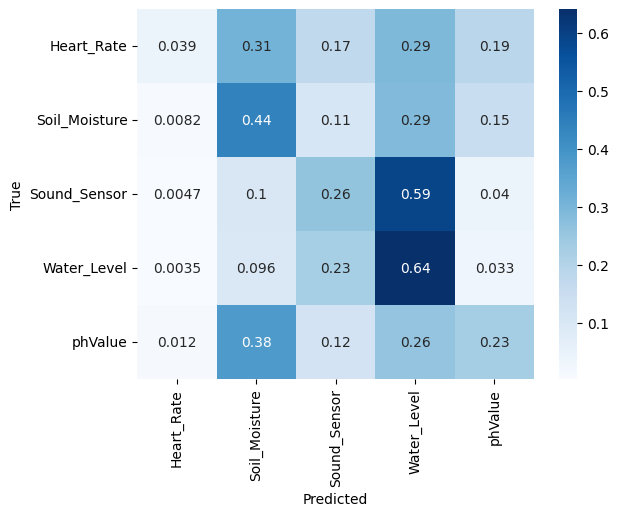

[*] Feature Importances: 
[0.196 0.179 0.202 0.237 0.185]

flow_duration: 0.196
mqtt_duration: 0.179
mqtt_connection_duration: 0.202
mqtt_connection_ack_duration: 0.237
mqtt_disconnection_duration: 0.185


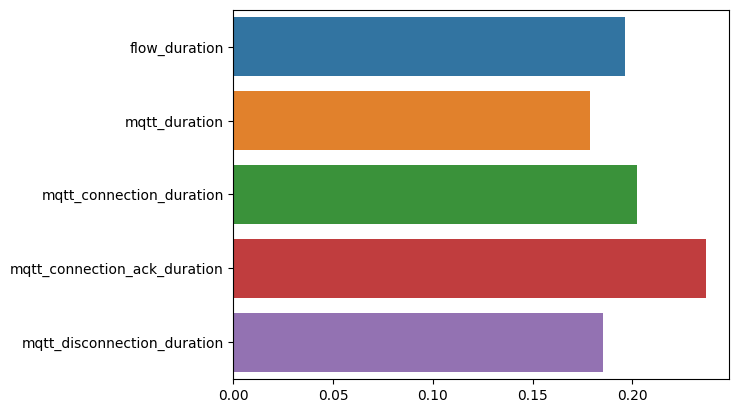

RandomForest:  80%|████████  | 4/5 [03:32<00:57, 57.81s/it]

[*] load dataset : dataset_test_case_04.csv
[*] train set split
[*] train RandomForest
[*] train result : 
	Accuracy 	: 0.42525110645853764
	Percision 	:  0.34893786161711143
	Recall 		:  0.3476494502661681
	F1-Score 	:  0.3382422923451914
[*] Confusion matrix : 


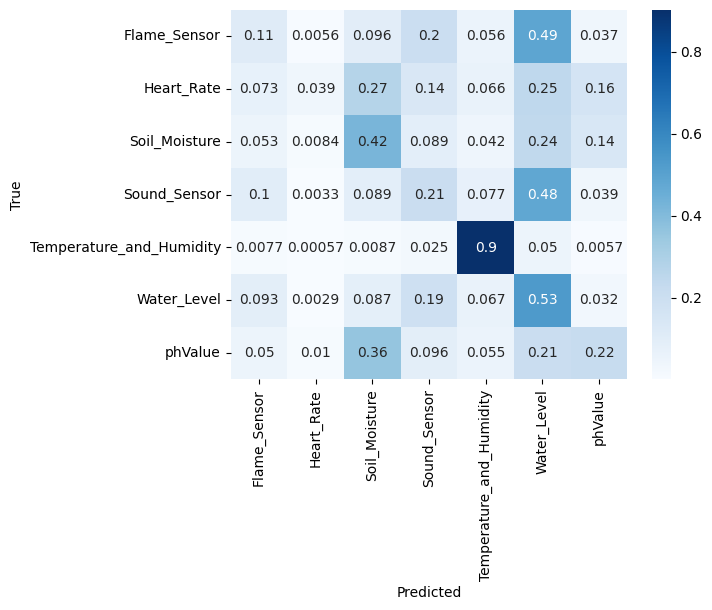

[*] Feature Importances: 
[0.221 0.163 0.235 0.214 0.168]

flow_duration: 0.221
mqtt_duration: 0.163
mqtt_connection_duration: 0.235
mqtt_connection_ack_duration: 0.214
mqtt_disconnection_duration: 0.168


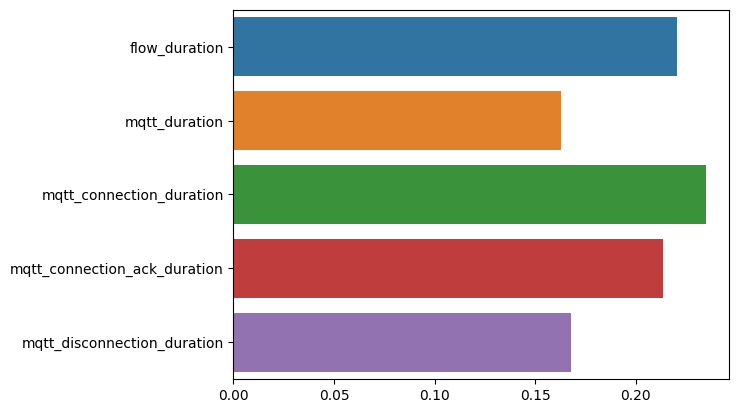

RandomForest: 100%|██████████| 5/5 [05:36<00:00, 67.33s/it]


In [1]:
# <-- import library -->
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import os
%matplotlib inline
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# <-- config -->
_TODAY = datetime.datetime.today().date()
dataset_dic = "./dataset/"
dataset_list = ["./dataset_test_case_01.csv", "./dataset_test_case_02.csv", "dataset_test_case_03_Digital.csv", "dataset_test_case_03_Analog.csv", "dataset_test_case_04.csv"]
IoT_list = ['Heart_Rate', 'Soil_Moisture', 'Sound_Sensor', 'Temperature_and_Humidity', 'Water_Level', 'phValue']
test_list = ['Digital_Output', 'Analog_Output']
features = ['src.port', 'flow_duration', 'mqtt_duration', 'mqtt_connection_duration', 'mqtt_connection_ack_duration', 'mqtt_disconnection_duration', 'IoT_label', 'test_label']
target_dict = {dataset_list[0] : features[-2], 
          dataset_list[1] : features[-1],
          dataset_list[2] : features[-2], 
          dataset_list[3] : features[-2],
          dataset_list[4] : features[-2]}

# <-- train -->
for dataset in tqdm(dataset_list, desc='RandomForest', position=0):
    print('[*] load dataset : ' + dataset)
    df = pd.read_csv(dataset_dic + dataset)
    # <-- train set split -->
    print('[*] train set split')
    train_features = features[1:-2]
    target = target_dict[dataset]

    X = df[train_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

    # <-- train RandomForest -->
    print('[*] train RandomForest')
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    print('[*] train result : ')
    accuracy = accuracy_score(y_test, y_pred)
    print('\tAccuracy \t: ', accuracy)
    percision = precision_score(y_test, y_pred, average='macro')
    print('\tPercision \t: ', percision)
    recall = recall_score(y_test, y_pred, average='macro')
    print('\tRecall \t\t: ', recall)
    f1 = f1_score(y_test, y_pred, average='macro')
    print('\tF1-Score \t: ', f1)

    print('[*] Confusion matrix : ')
    label = df[target].unique()
    matrix = confusion_matrix(y_test, y_pred, labels=label, normalize='true')
    sns.heatmap(matrix, annot=True, xticklabels=label, yticklabels=label, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("[*] Feature Importances: \n{0}\n".format(np.round(rf.feature_importances_, 3)))
    for name, value in zip(train_features, rf.feature_importances_):
        print('{0}: {1:.3f}'.format(name, value))
    sns.barplot(x=rf.feature_importances_, y=train_features)
    plt.show()
